<a href="https://colab.research.google.com/github/kishore-n-george/tabular-llm-comparison/blob/main/Dataset_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo, dotdict

# Set up configurations for consistent plotting
sns.set(style="whitegrid")

In [2]:
# Define a function for loading datasets
def fetch_airbnb_dataset(file_path='/content/AB_NYC_2019.csv', dataset_name='AirBnb'):
    """Load dataset and print basic info."""
    try:
        data = pd.read_csv(file_path)
        print(f"{dataset_name} loaded successfully!\n")
        print(f"Dataset shape: {data.shape}\n")
        print(f"Columns:\n{data.columns.tolist()}\n")
        print(f"First 5 rows:\n{data.head()}\n")
        return data
    except Exception as e:
        print(f"Error loading {dataset_name}: {e}")
        return None

fetch_airbnb_dataset();

Error loading AirBnb: [Errno 2] No such file or directory: '/content/AB_NYC_2019.csv'


In [3]:
data = fetch_ucirepo(id=275)

In [4]:
# print(data.data)
print(data.metadata.target_col[0])
#print(data.data.features)

cnt


Processing NYC Airbnb dataset...

AirBnb loaded successfully!

Dataset shape: (48895, 16)

Columns:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

First 5 rows:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73

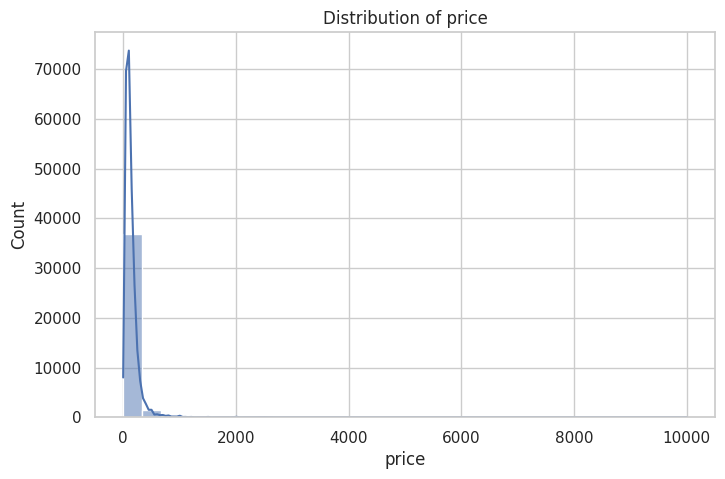

In [ ]:
# Define a function for preprocessing
def preprocess_data(data, categorical_cols=None, scaling_cols=None):
    """Preprocess dataset: handle missing values, encode categories, scale numeric data."""
    # Handle missing values
    data = data.dropna()  # Drop rows with missing values for simplicity

    # One-hot encoding for categorical features
    if categorical_cols:
        data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    # Scale numeric columns
    if scaling_cols:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        data[scaling_cols] = scaler.fit_transform(data[scaling_cols])

    print("Data preprocessing complete.\n")
    return data

# Define a function for exploratory data analysis
def perform_eda(data, target_column):
    """Perform basic EDA: print stats, plot distributions, and check correlations."""
    print("Basic Statistics:\n")
    print(data.describe().T)

    # Plot target variable distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(data[target_column], kde=True, bins=30)
    plt.title(f"Distribution of {target_column}")
    plt.show()

    # Plot correlation heatmap
    plt.figure(figsize=(12, 8))
    corr = data.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(corr))
    plt.title("Correlation Matrix")
    plt.show()

def get_all_datasets_dict():
  return {
      "Bike Sharing": dataframes["Bike Sharing"],
      "NYC Airbnb": dataframes["NYC Airbnb"],
      "Dry Bean": dataframes["Dry Bean"],
      "Online Shoppers": dataframes["Online Shoppers"]
        }



def process_all_datasets():
  # Paths to datasets (to be updated with actual paths)
  # Process each dataset
  dataframes = {}

  datasets = {
      #"Bike Sharing": 275,
      "NYC Airbnb": fetch_airbnb_dataset,
      #"Dry Bean": 602,
      #"Online Shoppers": 468
  }

  # Define target columns for each dataset
  target_columns = {
      "Bike Sharing": "count",  # Replace with actual target column name
      "NYC Airbnb": "price",  # Replace with actual target column name
      "Dry Bean": "Class",  # Replace with actual target column name
      "Online Shoppers": "Revenue",  # Replace with actual target column name
  }


  for dataset_name, id_fn in datasets.items():
      print(f"Processing {dataset_name} dataset...\n")
      if(isinstance(id_fn,int)):
        dataset = fetch_ucirepo(id=id_fn)
      else:
        dataset = id_fn()
      if dataset is not None:
          if((isinstance(dataset, dotdict))):
            #data = data.data
            original = dataset.data.original
            target_col = data.metadata.target_col[0]
            print(target_col)
          else:
            original = dataset
            target_col = target_columns.get(dataset_name)


          # Identify categorical and scaling columns (to be refined per dataset)
          categorical_cols = original.select_dtypes(include=['object']).columns.tolist()
          scaling_cols = original.select_dtypes(include=['float64', 'int64']).columns.tolist()
          scaling_cols.remove(target_col)  # Exclude target column from scaling

          # Preprocess data
          processed_data = preprocess_data(original, categorical_cols, scaling_cols)

          # Perform EDA
          perform_eda(processed_data, target_col)

          # Save processed dataframe
          dataframes[dataset_name] = processed_data

  print("Dataset preparation completed for all datasets.")
  print(dataframes)
  return dataframes

dataframes = process_all_datasets()
print("completed!!!!!!")